# Part 1

In [22]:
import pandas as pd

#Read in txt houses file with 9 columns
df = pd.read_csv('/content/drive/MyDrive/machine_learning/homework/cadata.txt', skiprows=27, sep='\s+', encoding_errors="replace", names= ['median house value', 'median income', 'housing median age', 'total rooms', 'total bedrooms', 'population', 'households', 'latitude', 'longitude'])
#row 27

print(df)

       median house value  median income  housing median age  total rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.8672                18.0       1860.0   
20639             89400.0         2.3886                16.0       2785.0   

       total bedrooms  population  households  latitude  longitude  
0     

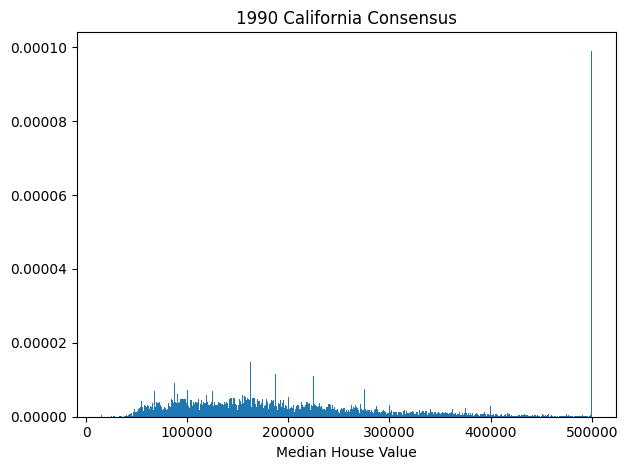

In [23]:

from matplotlib import pyplot as plt

num_bins = 1000

fig, ax = plt.subplots()

n, bins, patches = ax.hist(df['median house value'], num_bins, density=True)
ax.set_xlabel('Median House Value')
ax.set_title('1990 California Consensus')

fig.tight_layout()
plt.show()

## I am guessing that the y-axis is measuring abundance within this data set. Therefore, it may be in percent units that equal to 1 when summed. This distribution is not normal and may indicate a shrinking middle class. There is a right-skewed distribution and a large proportion of median house values at half a million dollars with a relatively large gap between 300,000 and 500,000 dollars.

Maximum value of total bedrooms: 6445.0


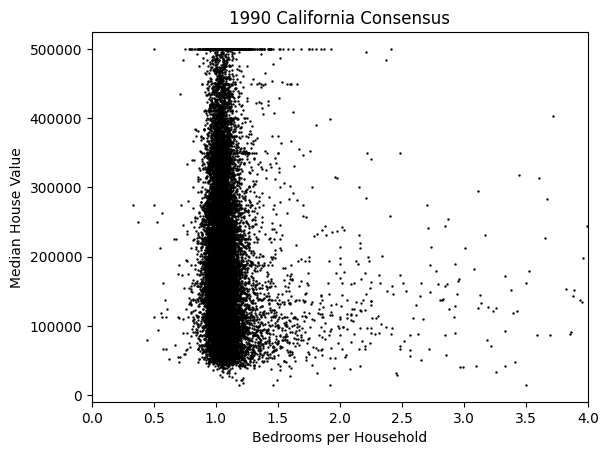

In [24]:
#bedrooms per household vs. median house value

fig, ax = plt.subplots()
house = df['total bedrooms']/df['households']
print('Maximum value of total bedrooms:', max(df['total bedrooms']))

ax.scatter(house, df['median house value'], s=0.5, color = 'black')

ax.set_ylabel('Median House Value')
ax.set_xlabel('Bedrooms per Household')
ax.set_title('1990 California Consensus')
ax.set_xlim(xmin = 0, xmax = 4)
fig.show()

## Judging by this scatterplot, I do not hypothesize that the amount of bedrooms is a significant factor in median house value. I'm also skeptical whether the "total number of bedrooms" feature is labeled correctly in the text file because the maximum amount of total bedrooms is ridiculously high (6445).

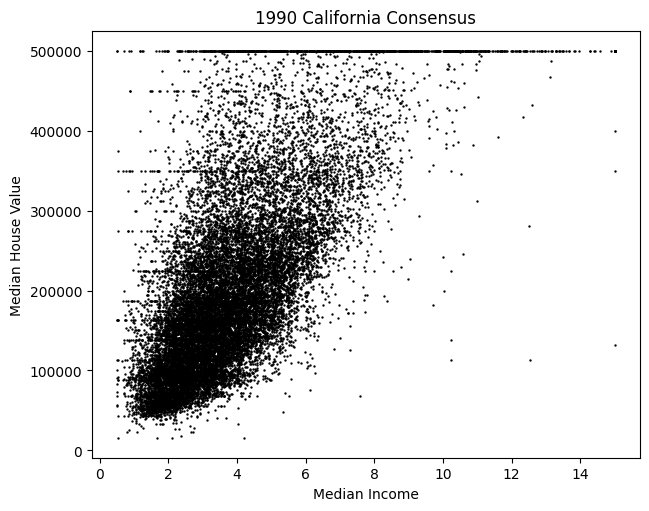

In [25]:
#median income vs. median house value

fig, ax = plt.subplots()

ax.scatter(df['median income'], df['median house value'], s=0.5, color = 'black')

fig.tight_layout()
ax.set_ylabel('Median House Value')
ax.set_xlabel('Median Income')
ax.set_title('1990 California Consensus')

fig.show()

## We see a slight (possibly significant) positive correlation between median income and median house value.

Maximum value of total rooms: 39320.0


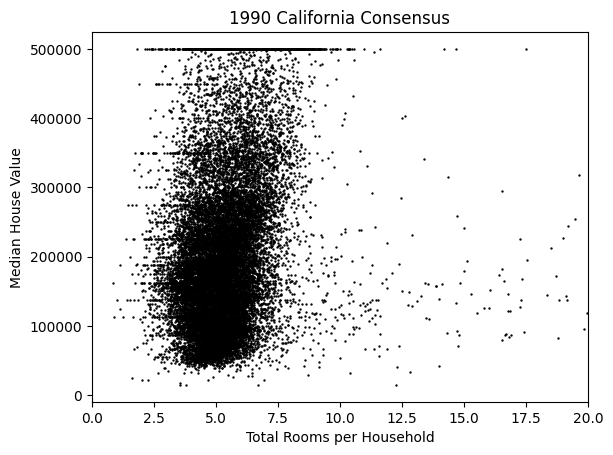

In [26]:
#total rooms per household vs. median house value

fig, ax = plt.subplots()
rooms = df['total rooms']/df['households']
print('Maximum value of total rooms:', max(df['total rooms']))

ax.scatter(rooms, df['median house value'], s=0.5, color = 'black')

ax.set_ylabel('Median House Value')
ax.set_xlabel('Total Rooms per Household')
ax.set_title('1990 California Consensus')
ax.set_xlim(xmin = 0, xmax = 20)
fig.show()

## The amount of rooms per household does not seem to be significantly correlated with median house value.

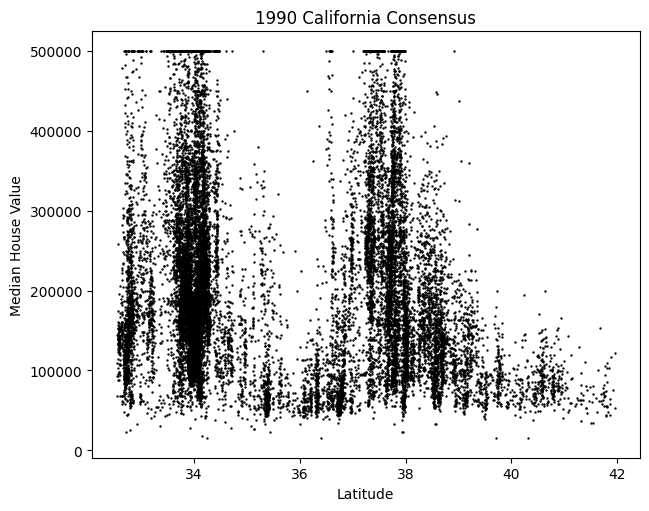

In [27]:
#latitude vs. median house value

fig, ax = plt.subplots()

ax.scatter(df['latitude'], df['median house value'], s=0.5, color = 'black')

fig.tight_layout()
ax.set_ylabel('Median House Value')
ax.set_xlabel('Latitude')
ax.set_title('1990 California Consensus')

fig.show()

## Median house values seem to be significantly increased at about 34 and 37.5 degrees latitude. There is a bimodal curve which may be indicative of wealthy areas in California and areas with lower median house values living at latitude degrees 36 and 40-42 (north). Additionally, we do not see a steady increase of median house values going from north to south.

# Part 2

In [28]:
#Read in onehot samples
onehot = pd.read_csv('/content/drive/MyDrive/machine_learning/homework/preprocessing_sample_data_onehot.csv', index_col = 0)

print(onehot)

     weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
0     0.003776         199.132337  285.580952          0          0          1
1     0.008966         193.617089  303.793877          0          0          1
2     0.003654         109.604169  364.958930          1          0          0
3     0.009349         249.698449  361.290959          0          0          1
4     0.005907         125.443557  231.345769          0          1          0
..         ...                ...         ...        ...        ...        ...
295   0.008644         246.964407  420.708288          1          0          0
296   0.003063         170.479134  221.817599          0          0          1
297   0.004922         198.432451  248.123720          0          1          0
298   0.009306         236.711134  324.668872          0          0          1
299   0.005467         247.185483  372.043726          1          0          0

[300 rows x 6 columns]


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
np.random.seed(5)

fit_data, test_data = train_test_split(onehot, test_size = 0.25)

fit = fit_data.drop(columns = 'avg_rating')
test = test_data.drop(columns = 'avg_rating')
#print(fit, test)

linear fit data score 0.9299773285877417
linear test data score 0.9100832065669706 

ridge fit data score 0.7288847483823705
ridge test data score 0.6498012509681663


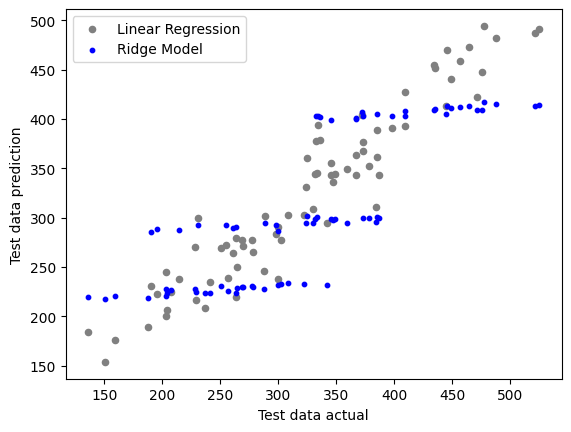

In [30]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
ridge = Ridge(alpha = 0.01)

model.fit(fit, fit_data['avg_rating'])
ridge.fit(fit, fit_data['avg_rating'])
fig, ax = plt.subplots()
ax.scatter(test_data['avg_rating'], model.predict(test), s=20, color='grey', label='Linear Regression')
ax.scatter(test_data['avg_rating'], ridge.predict(test), s=10, color='blue', label='Ridge Model')
ax.set_xlabel('Test data actual')
ax.set_ylabel('Test data prediction')
ax.legend()
fig.show()
print('linear fit data score', model.score(fit, fit_data['avg_rating']))
print('linear test data score', model.score(test, test_data['avg_rating']),'\n')

print('ridge fit data score', ridge.score(fit, fit_data['avg_rating']))
print('ridge test data score', ridge.score(test, test_data['avg_rating']))

fit data score 0.9299773273988193
test data score 0.9100815871076595


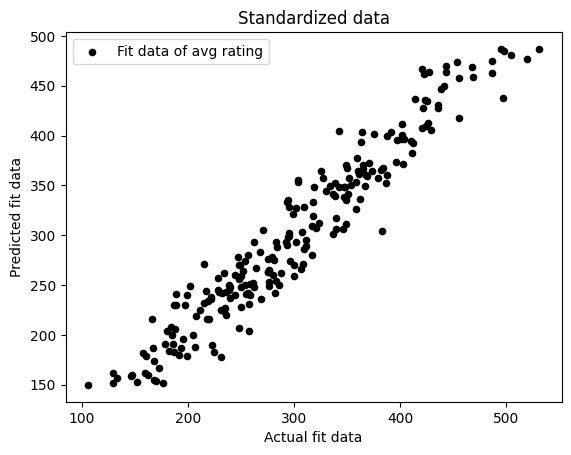

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = Ridge(alpha = 0.01)

scaler.fit(fit_data.drop('avg_rating', axis=1))
fit_data_features_transformed = scaler.transform(fit_data.drop('avg_rating', axis=1))
model.fit(fit_data_features_transformed, fit_data['avg_rating'])
print('fit data score', model.score(scaler.transform(fit_data.drop('avg_rating', axis=1)), fit_data['avg_rating']))
print('test data score', model.score(scaler.transform(test_data.drop('avg_rating', axis=1)), test_data['avg_rating']))

fig, ax = plt.subplots()
ax.scatter(fit_data['avg_rating'], model.predict(scaler.transform(fit_data.drop('avg_rating', axis=1))), label='Fit data of avg rating',color='black', s = 20)
ax.set_xlabel('Actual fit data')
ax.set_ylabel('Predicted fit data')

ax.set_title('Standardized data')
ax.legend()
plt.show()

fit data score 0.9299773285877416
test data score 0.9100832065669449


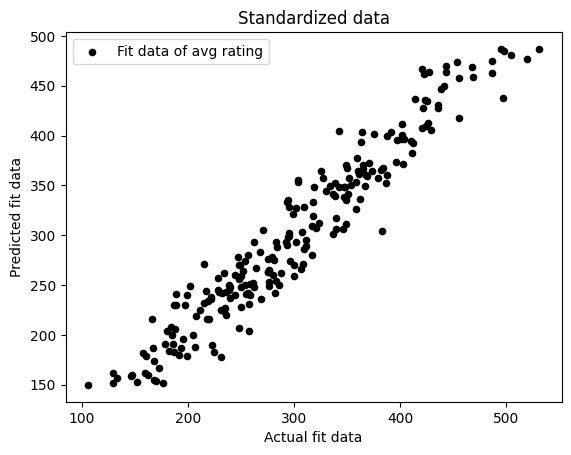

In [32]:
scaler = StandardScaler()
model = LinearRegression()

model.fit(fit, fit_data['avg_rating'])

scaler.fit(fit_data.drop('avg_rating', axis=1))
fit_data_features_transformed = scaler.transform(fit_data.drop('avg_rating', axis=1))
model.fit(fit_data_features_transformed, fit_data['avg_rating'])
print('fit data score', model.score(scaler.transform(fit_data.drop('avg_rating', axis=1)), fit_data['avg_rating']))
print('test data score', model.score(scaler.transform(test_data.drop('avg_rating', axis=1)), test_data['avg_rating']))

fig, ax = plt.subplots()
ax.scatter(fit_data['avg_rating'], model.predict(scaler.transform(fit_data.drop('avg_rating', axis=1))), label='Fit data of avg rating', color='black', s = 20)
ax.set_xlabel('Actual fit data')
ax.set_ylabel('Predicted fit data')

ax.set_title('Standardized data')
ax.legend()
plt.show()

## The linear regression model scores for both fitting and testing data did not change after being standardized. The ridge regression model did benefit greatly after standardization the StandardScaler. The ridge regression model had a score of 0.73 for fitting data and 0.65 for testing data before standardization and normalization. After applying StandardScaler, the score for fitting data increased to 0.93 and for testing data increased to 0.91.